In [1]:
!nvcc --version
!nvidia-smi

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Sun_Feb_14_21:12:58_PST_2021
Cuda compilation tools, release 11.2, V11.2.152
Build cuda_11.2.r11.2/compiler.29618528_0
Sun Jan 15 06:45:25 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |      

In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/MyDrive/lab4/ex4'
!ls

Mounted at /content/drive
/content/drive/MyDrive/lab4/ex4
lab4_ex4     program_output_question1.txt
lab4_ex4.cu  program_output_question2.txt


In [ ]:
!nvcc -arch=sm_75 -lcublas -lcusparse ./lab4_ex4.cu -o lab4_ex4

In [ ]:
!for i in {2..20..1}; do ./lab4_ex4 $((2 ** i)) 100; done

The X dimension of the grid is 4 
The number of time steps to perform is 100 
Timing - Allocating device memory. 		Elasped 122668 microseconds 
Timing - Initializing the sparse matrix on the host. 		Elasped 47 microseconds 
Timing - Initializing memory on the host. 		Elasped 1 microseconds 
Timing - Computing the SMPV. 			Elasped 978 microseconds 
The relative error of the approximation is 0.000000
The X dimension of the grid is 8 
The number of time steps to perform is 100 
Timing - Allocating device memory. 		Elasped 81960 microseconds 
Timing - Initializing the sparse matrix on the host. 		Elasped 41 microseconds 
Timing - Initializing memory on the host. 		Elasped 0 microseconds 
Timing - Computing the SMPV. 			Elasped 648 microseconds 
The relative error of the approximation is 0.000214
The X dimension of the grid is 16 
The number of time steps to perform is 100 
Timing - Allocating device memory. 		Elasped 83318 microseconds 
Timing - Initializing the sparse matrix on the host. 

In [3]:
import re
regex_dimX = "The X dimension of the grid is (.*)"
regex_smpv = "Timing - Computing the SMPV. \t\t\tElasped (.*) microseconds"

dimX = []
smpv_times = []
with open("./program_output_question1.txt") as file:
    for line in file:
        line_str = line.rstrip()
        dimX_re = re.search(regex_dimX, line_str)
        if dimX_re:
            dimX.append(float(dimX_re.group(1)))
        smpv_re = re.search(regex_smpv, line_str)
        if smpv_re:
            smpv_times.append(float(smpv_re.group(1)) * 1e-6)

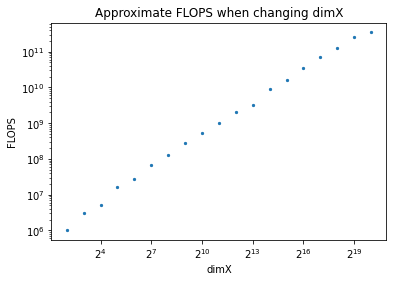

In [4]:
import matplotlib.pyplot as plt
import numpy as np

num_timesteps = 100
flops = [num_timesteps * (3 * dim - 6) / time for dim, time in zip(dimX, smpv_times)]

fig, ax = plt.subplots()
ax.scatter(dimX, flops, s=5)
ax.set_xscale('log', basex=2)
ax.set_yscale('log', basey=10)
ax.set_xlabel('dimX')
ax.set_ylabel('FLOPS')
ax.set_title('Approximate FLOPS when changing dimX',fontsize=12)
plt.show()

In [ ]:
!for i in {100..10000..100}; do ./lab4_ex4 128 $i; done

The X dimension of the grid is 128 
The number of time steps to perform is 100 
Timing - Allocating device memory. 		Elasped 109984 microseconds 
Timing - Initializing the sparse matrix on the host. 		Elasped 51 microseconds 
Timing - Initializing memory on the host. 		Elasped 0 microseconds 
Timing - Computing the SMPV. 			Elasped 643 microseconds 
The relative error of the approximation is 3.318021
The X dimension of the grid is 128 
The number of time steps to perform is 200 
Timing - Allocating device memory. 		Elasped 81805 microseconds 
Timing - Initializing the sparse matrix on the host. 		Elasped 43 microseconds 
Timing - Initializing memory on the host. 		Elasped 1 microseconds 
Timing - Computing the SMPV. 			Elasped 1856 microseconds 
The relative error of the approximation is 2.723174
The X dimension of the grid is 128 
The number of time steps to perform is 300 
Timing - Allocating device memory. 		Elasped 80176 microseconds 
Timing - Initializing the sparse matrix on the 

In [5]:
import re

regex_float = "[+-]?[0-9]+\.[0-9]+"

num_timesteps = []
relative_errors = []
with open("./program_output_question2.txt") as file:
    for line in file:
        line_str = line.rstrip()
        relative_error = re.search(regex_float, line_str)
        if relative_error:
            relative_errors.append(float(relative_error.group(0)))
        split = line_str.rsplit("The number of time steps to perform is ")
        if len(split) != 1:
            num_timesteps.append(int(split[-1]))

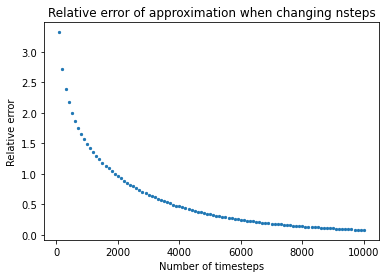

In [6]:

import matplotlib.pyplot as plt

plt.scatter(num_timesteps, relative_errors, s=5)
plt.xlabel('Number of timesteps')
plt.ylabel('Relative error')
plt.title("Relative error of approximation when changing nsteps",fontsize=12)
plt.show()

In [ ]:
!nvcc -arch=sm_75 -lcublas -lcusparse ./lab4_ex4.cu -o lab4_ex4
!nvprof ./lab4_ex4 128 1000

The X dimension of the grid is 128 
The number of time steps to perform is 1000 
==6025== NVPROF is profiling process 6025, command: ./lab4_ex4 128 1000
Timing - Allocating device memory. 		Elasped 301754 microseconds 
Timing - Initializing the sparse matrix on the host. 		Elasped 83 microseconds 
Timing - Initializing memory on the host. 		Elasped 0 microseconds 
Timing - Computing the SMPV. 			Elasped 15390 microseconds 
The relative error of the approximation is 1.488118
==6025== Profiling application: ./lab4_ex4 128 1000
==6025== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   74.98%  95.098ms      2004  47.453us  43.199us  52.831us  void nrm2_kernel<double, double, double, int=0, int=0, int=128>(cublasNrm2Params<double, double>)
                   12.86%  16.311ms      1000  16.310us  16.127us  20.287us  _ZN8cusparse21load_balancing_kernelILj512ELj4ELm16384EiiNS_7CsrmvOpILi512EdLb0EEEJKiKdS4_didEEEvPKT3_T2_S5_S

In [ ]:
!nvcc -arch=sm_75 -lcublas -lcusparse ./lab4_ex4.cu -o lab4_ex4
!nvprof ./lab4_ex4 128 1000

The X dimension of the grid is 128 
The number of time steps to perform is 1000 
==6451== NVPROF is profiling process 6451, command: ./lab4_ex4 128 1000
Timing - Allocating device memory. 		Elasped 251910 microseconds 
Timing - Initializing the sparse matrix on the host. 		Elasped 78 microseconds 
Timing - Initializing memory on the host. 		Elasped 0 microseconds 
Timing - Computing the SMPV. 			Elasped 15363 microseconds 
The relative error of the approximation is 1.488118
==6451== Profiling application: ./lab4_ex4 128 1000
==6451== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   75.09%  95.139ms      2004  47.474us  43.871us  52.735us  void nrm2_kernel<double, double, double, int=0, int=0, int=128>(cublasNrm2Params<double, double>)
                   12.78%  16.194ms      1000  16.194us  16.095us  16.608us  _ZN8cusparse21load_balancing_kernelILj512ELj4ELm16384EiiNS_7CsrmvOpILi512EdLb0EEEJKiKdS4_didEEEvPKT3_T2_S5_S